# Get imports and prepare the synthetic data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
sns.set()
sns.set_style("darkgrid", {'image.cmap': u'plasma'})

np.random.seed(11111111)

In [28]:
# define the mean retunrs and the standard deviations for a synthetic, 2-stock portfolio
mean_return = 0.01 * np.random.randn(2) # return from distribution with mean 0 standard deviation 0.01
rho = 0.01 * np.random.randn() # generate a random correlation coefficient between the two stocks
sigma = np.exp(np.random.randn(2)) # generate a random standard deviation for the two stocks. We use the exponential function to ensure that the standard deviations are positive

In [29]:
print(mean_return, rho, sigma)

[-0.00798242  0.00181554] 0.007129547452251222 [2.83423006 0.50425457]


In [30]:
# create the covariance matrix
cov = np.array([[sigma[0]**2, rho*sigma[0]*sigma[1]], [rho*sigma[0]*sigma[1], sigma[1]**2]])
print(cov)

[[8.03286002 0.01018936]
 [0.01018936 0.25427267]]


In [31]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)
    return e_x / e_x.sum()


# Generate random long-portofolios

In [32]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
n_portfolios = 1000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    # generate random weights for the two stocks in the portfolio and normalize them to sum to 1 
    # using the softmax function defined above 
    weights = softmax(np.random.randn(2))
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

In [33]:
def plot_portfolios(returns, risks):
    """Plot the returns and risks of the portfolios.
    Draw a scatter plot of the returns and the risks of the portfolios
    The color of the points is determined by the density of the points
    """
    plt.figure(figsize=(10, 6))
    xy = np.vstack([risks,returns])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    risks, returns, z = risks[idx], returns[idx], z[idx]
    plt.scatter(risks, returns, c=z, marker='o')
    plt.xlabel('Risk')
    plt.ylabel('Return')



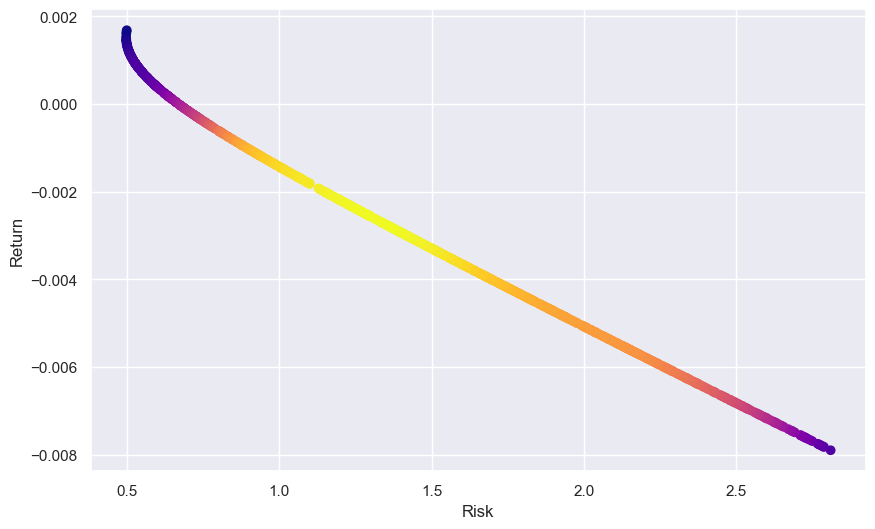

In [34]:
plot_portfolios(returns, risks) # plot the portfolios generated above

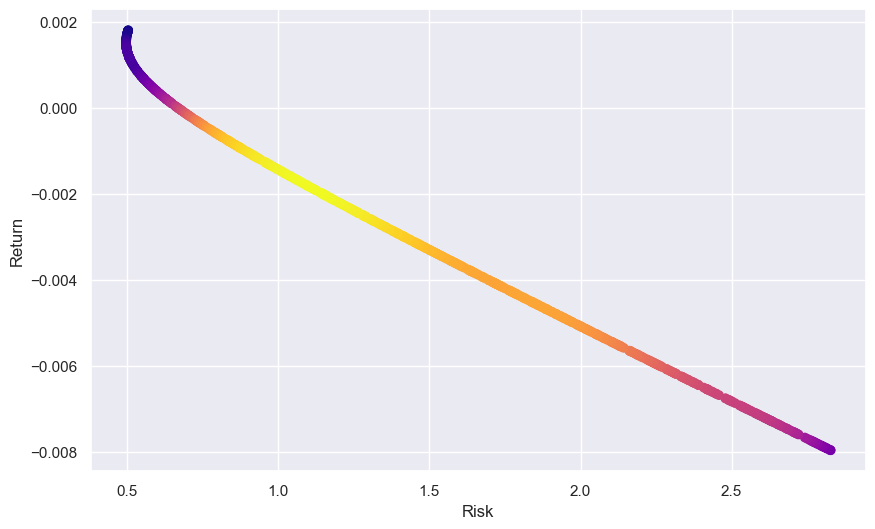

In [35]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
# This time we use a different way of generating the random weights
n_portfolios = 1000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    x = np.random.random() # generate a random number from a normal distribution
    weights = np.array([x, 1-x]) # create a vector with the two weights
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

plot_portfolios(returns, risks) # plot the portfolios generated above

# Generate portofolios allowing for short selling

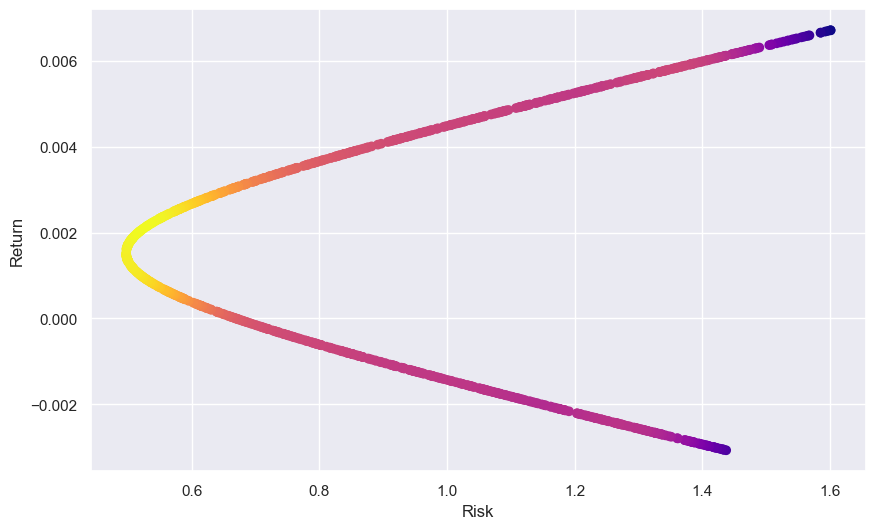

In [36]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
# This time we use a different way of generating the random weights
n_portfolios = 1000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    x = np.random.random() - 0.5 # generate a random number from a normal distribution
    weights = np.array([x, 1-x]) # create a vector with the two weights
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

plot_portfolios(returns, risks) # plot the portfolios generated above

# Expand the above the 3-asset portofolio

In [37]:
# define the mean retunrs and the standard deviations for a synthetic, 3-stock portfolio
mean_return = 0.01 * np.random.randn(3) # return from distribution with mean 0 standard deviation 0.01
rho = 0.01 * np.random.randn(3) # generate random correlation coefficients between the three stocks
sigma = np.exp(np.random.randn(3)) # generate a random standard deviation for the three stocks. We use the exponential function to ensure that the standard deviations are positive

In [38]:
print(mean_return, rho, sigma)

[-0.00064955 -0.00479921  0.00296115] [ 0.00062332 -0.00909611  0.00461108] [0.58969454 6.61732752 0.95468421]


In [39]:
# calculate the covariance matrix for the three stocks
cov = np.array([[sigma[0]**2, rho[0]*sigma[0]*sigma[1], rho[1]*sigma[0]*sigma[2]],
                [rho[0]*sigma[0]*sigma[1], sigma[1]**2, rho[2]*sigma[1]*sigma[2]],
                [rho[1]*sigma[0]*sigma[2], rho[2]*sigma[1]*sigma[2], sigma[2]**2]])
print(cov)

[[ 3.47739647e-01  2.43230966e-03 -5.12085836e-03]
 [ 2.43230966e-03  4.37890236e+01  2.91303317e-02]
 [-5.12085836e-03  2.91303317e-02  9.11421944e-01]]


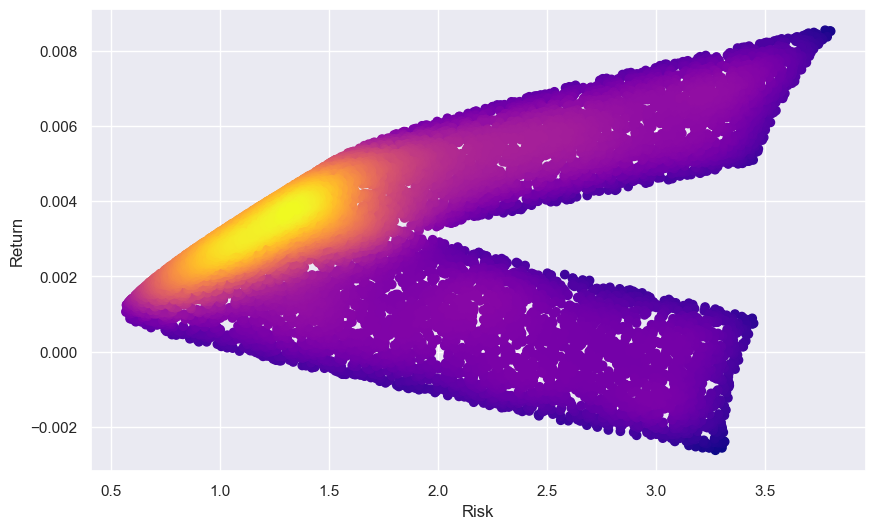

In [40]:
# Generate random portfolios and calculate their returns and risks (standard deviations)
# This time we use a different way of generating the random weights
n_portfolios = 10000 # number of portfolios to generate
returns = np.zeros(n_portfolios) # array to store the returns
risks = np.zeros(n_portfolios) # array to store the risks
for idx in range(n_portfolios): # loop over the number of portfolios
    x1, x2 = np.random.random(2) - 0.5 # generate a random number from a normal distribution
    weights = np.array([x1, x2, 1-x1-x2]) # create a vector with the two weights
    # calculate the return and the risk
    returns[idx] = np.dot(weights, mean_return)
    risks[idx] = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

plot_portfolios(returns, risks) # plot the portfolios generated above

# Finding Maximum and Minimum with a Linear Program (LP)

In [41]:
from scipy.optimize import linprog

In [42]:
D = len(mean_return) # number of stocks in the portfolio
A_eq = np.ones((1, D)) # create the equality constraint matrix
b_eq = np.ones(1) # create the equality constraint vector
bounds = tuple((-0.5, None) for x in range(D)) # set the bounds of the weights to be between -0.5 and no upper bound to maintain consistency with the random weights generated in the monte carlo simulation
print(A_eq, b_eq, bounds)

[[1. 1. 1.]] [1.] ((-0.5, None), (-0.5, None), (-0.5, None))


In [43]:
# minimize the risk of the portfolio
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
min_return = res.fun
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.010754214069968404
              x: [-5.000e-01  2.000e+00 -5.000e-01]
            nit: 0
          lower:  residual: [ 0.000e+00  2.500e+00  0.000e+00]
                 marginals: [ 4.150e-03  0.000e+00  7.760e-03]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-4.799e-03]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [44]:
res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
max_return = -res.fun
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.0086466730950073
              x: [-5.000e-01 -5.000e-01  2.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  2.500e+00]
                 marginals: [ 3.611e-03  7.760e-03  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.961e-03]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [45]:
print(min_return, max_return)

-0.010754214069968404 0.0086466730950073


# Mean-Variance Optimization & Efficient Frontier

In [46]:
from scipy.optimize import minimize

In [47]:
N = 100 # number of steps
target_returns = np.linspace(min_return, max_return, N) # create an array of target returns to optimize the weights of the stocks in the portfolio for

In [48]:
def get_portofolio_variance(weights, cov_matrix):
    """Calculate the variance of the portfolio.
    Calculate the variance of the portfolio given the weights of the stocks in the portfolio and the covariance matrix of the returns
    
    Parameters
    ----------
    weights : numpy array
        The weights of the stocks in the portfolio
    cov_matrix : numpy array
        The covariance matrix of the returns of the stocks in the portfolio

    Returns
    -------
    float
        The variance of the portfolio
    """
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def target_return_constraint(weights, target):
    """Calculate the difference between the target return and the actual return of the portfolio.
    Calculate the difference between the target return and the actual return of the portfolio given the weights of the stocks in the portfolio and the mean returns of the stocks in the portfolio
    This is to be used as an equality constraint in the optimization. 

    Parameters
    ----------
    weights : numpy array
        The weights of the stocks in the portfolio
    target : float
        The target return of the portfolio

    Returns
    -------
    float
        The difference between the target return and the actual return of the portfolio
    """
    return np.dot(weights, mean_return) - target

def portofolio_constraint(weights):
    """Calculate the difference between the sum of the weights and 1.
    Calculate the difference between the sum of the weights and 1 to make sure that the sum of the weights is 1
    This is to be used as an equality constraint in the optimization. 

    Parameters
    ----------
    weights : numpy array
        The weights of the stocks in the portfolio

    Returns
    -------
    float
        The difference between the sum of the weights and 1
    """
    return np.sum(weights) - 1

constraints = [
    {'type': 'eq', 
     'fun': target_return_constraint,
     'args': [target_returns[0]],
     },
    {'type': 'eq',
      'fun': portofolio_constraint,
     }
]

In [49]:
# Generate efficient frontier by running through all the target returns
optimizer_risks = []
for target in target_returns:
    constraints[0]['args'] = [target]
    res = minimize(fun=get_portofolio_variance, 
               x0 = np.ones(D)/D,
               args=(cov,), 
               method='SLSQP', 
               constraints=constraints,
               bounds=bounds,
               )
    optimizer_risks.append(np.sqrt(res.fun))

    if res.status != 0:
        print(res.message) # print the error message if the optimization fails


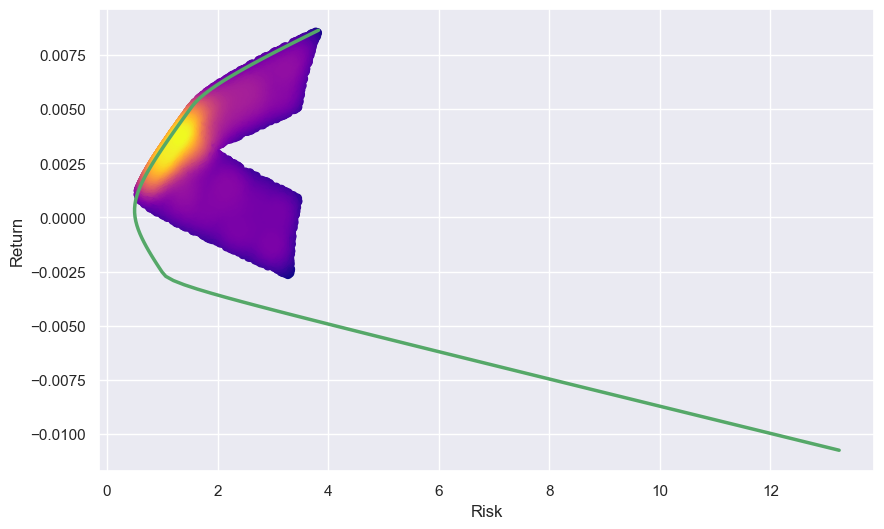

In [51]:
plot_portfolios(returns, risks) # plot the portfolios generated above
plt.plot(optimizer_risks, target_returns, c='g', linewidth=2.5, label='Efficient Frontier')

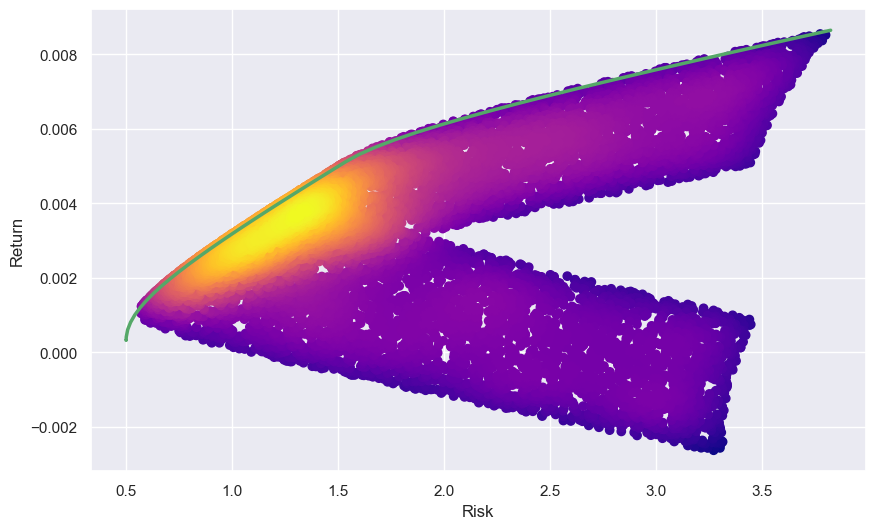

In [54]:
# We can repeat the above, but now constrain the return to be positive
# This will give us the maximum return for a given risk
constraints = [
    {'type': 'ineq',
        'fun': target_return_constraint,
        'args': [target_returns[0]],
    },
    {'type': 'eq',
        'fun': portofolio_constraint,
    }
]

# Generate efficient frontier by running through all the target returns
optimizer_risks = []
optimized_returns = []
for target in target_returns:
    constraints[0]['args'] = [target]
    res = minimize(fun=get_portofolio_variance, 
               x0 = np.ones(D)/D,
               args=(cov,), 
               method='SLSQP', 
               constraints=constraints,
               bounds=bounds,
               )
    optimizer_risks.append(np.sqrt(res.fun))
    optimized_returns.append(np.dot(res.x, mean_return))

    if res.status != 0:
        print(res.message) # print the error message if the optimization fails

plot_portfolios(returns, risks) # plot the portfolios generated above
plt.plot(optimizer_risks, optimized_returns, c='g', linewidth=2.5, label='Efficient Frontier')
